In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.**

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# description of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# info about datatypes and null values in each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


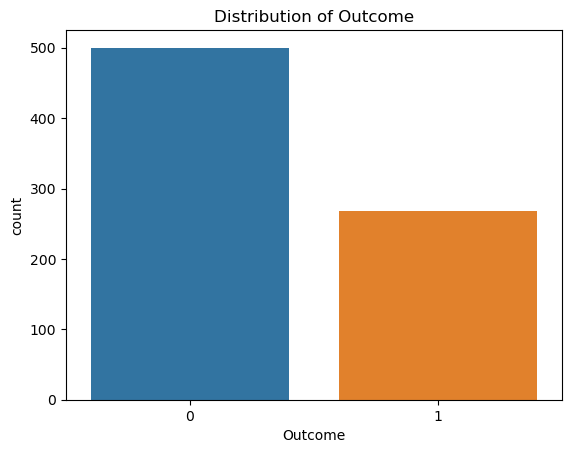

In [6]:
# plot countplot:

sns.countplot(x='Outcome',data=df)
plt.title("Distribution of Outcome")
plt.show()

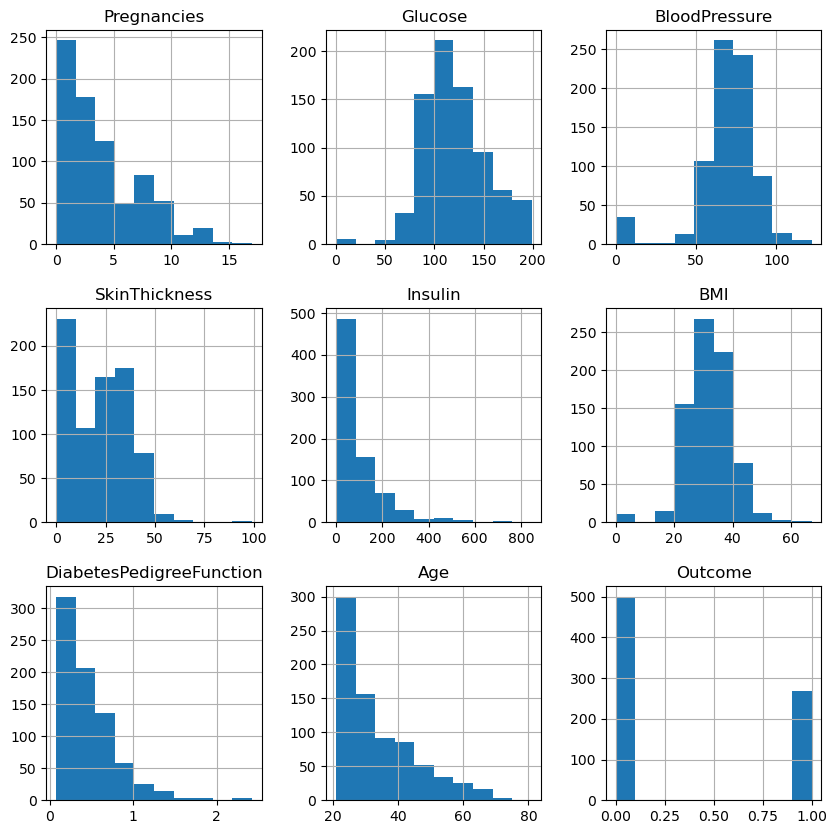

In [7]:
# histogram:

df.hist(figsize=(10,10))
plt.show()

In [ ]:
## pairplot
sns.pairplot(df, hue="Outcome")
plt.suptitle("Pair Plot of Diabetes Dataset", fontsize=16)
plt.show()

In [ ]:
df.corr()

In [ ]:
## correlation matrix:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Matrix of Diabetes Dataset")
plt.show()

**Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.**

In [ ]:
df.isna().sum()

In [ ]:
# visualize outliers
df.plot(kind="box", figsize=(20,10))
plt.title("Boxplot of Diabetes Dataset")
plt.show()

In [ ]:
# some modification
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())

In [ ]:
df.describe()

In [ ]:
df.plot(kind="box", figsize=(20,10))
plt.title("Boxplot of Diabetes Dataset")
plt.show()

**Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.**

In [ ]:
from sklearn.model_selection import train_test_split

# Define the input features and target variable
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

**Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
dt = DecisionTreeClassifier()

# Fit the decision tree classifier to the training data
dt.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    "max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    
}

# Create a grid search cross-validation object
grid_search = GridSearchCV(dt, param_grid, cv=10)

# Fit the grid search cross-validation object to the training data
grid_search.fit(X_train, y_train)

# best parameters
grid_search.best_params_

In [ ]:
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

In [ ]:
from sklearn.metrics import classification_report

# Predict the target variable for the test data
y_pred = grid_search.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

**Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.**

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,confusion_matrix,roc_curve

In [ ]:
acc=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

print("Accuracy:", acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [ ]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap="Blues", interpolation="nearest")
plt.colorbar()
plt.xticks([0, 1], ["No Diabetes", "Diabetes"])
plt.yticks([0, 1], ["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Plot the ROC curve
from sklearn.metrics import auc

y_prob = grid_search.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=1, label="ROC (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], "--", color="gray", label="Random Guess")
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

**Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.**

In [ ]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(grid_search.best_estimator_, feature_names=X_train.columns, class_names=["No Diabetes", "Diabetes"], filled=True, fontsize=10)
plt.show()

In [ ]:
from sklearn.tree import export_text

tree_rules = export_text(grid_search.best_estimator_, feature_names=X_train.columns.tolist())
print(tree_rules)

The first split in the decision tree is based on the Glucose variable, with a threshold of 127.5. This means that if a patient's glucose level is above 127.5, they are likely to have diabetes, and the algorithm will move down the left branch of the decision tree. If their glucose level is below or equal to 127.5, the algorithm will move down the right branch, which indicates a lower probability of diabetes.

The second level of the decision tree is based on the BMI variable, with a threshold of 26.35. If a patient's BMI is above this threshold, they are more likely to have diabetes, and the algorithm will move down the left branch. If their BMI is below or equal to the threshold, the algorithm will move down the right branch.

The third level of the decision tree is based on the Age variable, with a threshold of 28.5. If a patient's age is below or equal to this threshold, they are more likely to have diabetes, and the algorithm will move down the left branch. If their age is above the threshold, the algorithm will move down the right branch.

The fourth level of the decision tree is based on the Insulin variable, with a threshold of 140.5. If a patient's insulin level is above this threshold, they are more likely to have diabetes, and the algorithm will move down the left branch. If their insulin level is below or equal to the threshold, the algorithm will move down the right branch.

The fifth level of the decision tree is based on the BMI variable again, with a threshold of 29.15. If a patient's BMI is above this threshold, they are more likely to have diabetes, and the algorithm will move down the left branch. If their BMI is below or equal to the threshold, the algorithm will move down the right branch.

The sixth level of the decision tree is based on the BloodPressure variable, with a threshold of 62.5. If a patient's blood pressure is below or equal to this threshold, they are more likely to have diabetes, and the algorithm will move down the left branch. If their blood pressure is above the threshold, the algorithm will move down the right branch.

The seventh level of the decision tree is based on the Age variable again, with a threshold of 36.5. If a patient's age is below or equal to this threshold, they are more likely to have diabetes, and the algorithm will move down the left branch. If their age is above the threshold, the algorithm will move down the right branch.

The eighth level of the decision tree is based on the BMI variable again, with a threshold of 42.05. If a patient's BMI is above this threshold, they are more likely to have diabetes, and the algorithm will move down the left branch. If their BMI is below or equal to the threshold, the algorithm will move down the right branch.

**Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.**

In [ ]:
# Vary the threshold values of the decision tree
threshold_values = np.arange(0.1, 0.9, 0.1)
accuracy_scores = []

for threshold in threshold_values:
    dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=20, min_samples_leaf=10, class_weight='balanced', random_state=42, ccp_alpha=threshold)
    dt_model.fit(df.drop('Outcome', axis=1), df['Outcome'])
    y_pred = dt_model.predict(df.drop('Outcome', axis=1))
    accuracy = accuracy_score(df['Outcome'], y_pred)
    accuracy_scores.append(accuracy)
    
plt.plot(threshold_values, accuracy_scores)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Sensitivity analysis of decision tree model')
plt.show()

Sensitivity analysis involves examining how changes in the input variables affect the output of the model. For example, we can vary the threshold values for the splits in the decision tree to see how they affect the model's performance. We can also vary the hyperparameters used in the decision tree algorithm, such as the maximum depth of the tree or the minimum number of samples required to split a node, to see how they affect the model's accuracy.

Scenario testing involves applying the decision tree model to new data or testing its robustness to changes in the dataset or the environment. For example, we can collect new data from different sources or under different conditions and test how well the model performs on this data. We can also introduce different types of errors or biases into the data to see how well the model can handle these challenges.

By performing sensitivity analysis and scenario testing, we can gain a better understanding of the strengths and limitations of the decision tree model, and identify areas for improvement or further research.